In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import  cross_val_score
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
import xgboost as xgb


In [26]:
df=pd.read_csv(r"C:\Users\surej\OneDrive\Desktop\project\capstonproj4-micro\GUIDE_Train.csv")

In [117]:
df.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [16]:
df.isna().sum()[:25]

Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
MitreTechniques     5468386
IncidentGrade         51340
ActionGrouped       9460773
ActionGranular      9460773
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
EmailClusterId      9420025
dtype: int64

In [120]:
df.isna().sum()[25:]

RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileName                    0
FolderPath                  0
ResourceIdName              0
ResourceType          9509762
Roles                 9298686
OSFamily                    0
OSVersion                   0
AntispamDirection     9339535
SuspicionLevel        8072708
LastVerdict           7282572
CountryCode                 0
State                       0
City                        0
dtype: int64

In [12]:
df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')

In [27]:
#columns_to_drop = ['AntispamDirection','Id','OrgId', 'IncidentId', 'AlertId',
#                   'ActionGrouped', 'ActionGranular', 'EmailClusterId','ResourceType','Roles','ThreatFamily','Sha256','FileName'
#                   ]
columns_to_drop = ['ActionGrouped', 'ActionGranular', 'EmailClusterId', 'ThreatFamily', 
                   'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict','ResourceIdName','OAuthApplicationId','RegistryValueName','RegistryValueData','ApplicationId',
                   'ApplicationName','OSFamily','OSVersion']

Traindataset=df.drop(columns_to_drop,axis=1)


In [129]:
Traindataset

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
5,1322849927433,11,417400,825450,2024-06-10T13:30:56.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,3421,881,289573,117668,3586,5,66,8,6,3
15,781684051738,2119,6622,23284,2024-06-10T10:28:29.000Z,13,11,InitialAccess,T1566,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
16,635655163305,261,110412,41503,2024-06-03T17:05:40.000Z,1794,344,Collection,T1098;T1114,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
17,429496732853,51,84683,134887,2024-06-05T04:17:50.000Z,39,26,Execution,T1559;T1106;T1059.005,BenignPositive,...,3421,881,3,6,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516826,1692217116375,0,440,164344,2024-06-06T20:27:13.000Z,0,0,InitialAccess,T1078;T1078.004,TruePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516827,206158430958,127,108,1201847,2024-06-08T02:22:19.000Z,0,0,InitialAccess,T1078;T1078.004,TruePositive,...,3421,881,289573,117668,3586,5,66,1,0,0
9516828,1108101564153,0,319,499915,2024-06-07T22:15:15.000Z,0,0,InitialAccess,T1078;T1078.004,TruePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516829,790273987737,104,7,1913,2024-06-03T12:51:44.000Z,11,9,InitialAccess,T1566,FalsePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [28]:
Traindataset.dropna(inplace=True)


In [110]:
print(Traindataset.columns)
print(Traindataset['NetworkMessageId'].dtype)

Index(['Timestamp', 'DetectorId', 'AlertTitle', 'Category', 'MitreTechniques',
       'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId', 'IpAddress',
       'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName',
       'DeviceName', 'NetworkMessageId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'FolderPath', 'ResourceIdName', 'OSFamily',
       'OSVersion', 'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State',
       'City'],
      dtype='object')
int64


In [29]:
Traindataset['Timestamp'] = pd.to_datetime(Traindataset['Timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ')

Traindataset['incident_hour'] = Traindataset['Timestamp'].dt.hour
Traindataset['incident_dayofweek'] = Traindataset['Timestamp'].dt.dayofweek
Traindataset['is_weekend'] = Traindataset['incident_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
Traindataset['incident_year'] = Traindataset['Timestamp'].dt.year
Traindataset['incident_month'] = Traindataset['Timestamp'].dt.month

Traindataset[['Timestamp', 'incident_hour', 'incident_dayofweek', 'is_weekend','incident_month','incident_year']].head()


,Timestamp,incident_hour,incident_dayofweek,is_weekend,incident_month,incident_year
2,2024-06-13 04:52:55,4,3,0,6,2024
5,2024-06-10 13:30:56,13,0,0,6,2024
15,2024-06-10 10:28:29,10,0,0,6,2024
16,2024-06-03 17:05:40,17,0,0,6,2024
17,2024-06-05 04:17:50,4,2,0,6,2024


In [30]:
Traindataset.drop('Timestamp', axis=1, inplace=True)

In [31]:
#categorical_columns = ['Category', 'MitreTechniques', 'AlertTitle','CountryCode','IncidentGrade','EntityType','EvidenceRole','Timestamp','SuspicionLevel','LastVerdict']
categorical_columns = Traindataset.select_dtypes(include=['object']).columns


label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    Traindataset[column] = le.fit_transform(Traindataset[column].astype(str))
    label_encoders[column] = le

In [32]:
Traindataset = Traindataset.apply(pd.to_numeric, downcast='integer')
#Traindataset.corr()

In [33]:
Traindataset.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'MitreTechniques', 'IncidentGrade', 'EntityType',
       'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
       'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City',
       'incident_hour', 'incident_dayofweek', 'is_weekend', 'incident_year',
       'incident_month'],
      dtype='object')

In [11]:
X=Traindataset.drop(['IncidentGrade'],axis=1)
y=Traindataset['IncidentGrade']

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Print the results
    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print(report)
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Accuracy:", cv_scores.mean())
    print("="*50)  # Separator for readability


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'n_estimators': [50],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

def evaluate_model(y_true, y_pred):
    report = classification_report(y_true, y_pred, target_names=['TP', 'BP', 'FP'])
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    return report, f1, precision, recall

results = {}
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models.items():
    print(f"Training {name}...")
    
    params = param_grids[name]  
    
    if name == 'XGBoost':
        search = RandomizedSearchCV(model, params, n_iter=10, cv=3, scoring='f1_macro', verbose=1, random_state=42)
    else:
        search = GridSearchCV(model, params, cv=3, scoring='f1_macro', verbose=1)
    
    search.fit(X_train, y_train)
    
    best_model = search.best_estimator_
    
    y_pred = best_model.predict(X_val)
    
    report, f1, precision, recall = evaluate_model(y_val, y_pred)
    
    results[name] = {
        'Best Parameters': search.best_params_,
        'Classification Report': report,
        'Macro F1 Score': f1,
        'Macro Precision': precision,
        'Macro Recall': recall
    }

for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print(f"Best Parameters: {metrics['Best Parameters']}")
    print(f"Macro F1 Score: {metrics['Macro F1 Score']:.4f}")
    print(f"Macro Precision: {metrics['Macro Precision']:.4f}")
    print(f"Macro Recall: {metrics['Macro Recall']:.4f}")
    print(f"Classification Report:\n{metrics['Classification Report']}")


In [14]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Random Forest': {
        'n_estimators': [30],  
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'n_estimators': [30],  
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1]
    }
}

def evaluate_model(y_true, y_pred):
    report = classification_report(y_true, y_pred, target_names=['TP', 'BP', 'FP'])
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    return report, f1, precision, recall

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, test_size=0.7, random_state=42)

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    
    params = param_grids[name]  

    search = HalvingGridSearchCV(model, params, cv=2, scoring='f1_macro', verbose=1, n_jobs=-1)
    
    search.fit(X_train_sub, y_train_sub)
    
    best_model = search.best_estimator_
    
    y_pred = best_model.predict(X_val)
    
    report, f1, precision, recall = evaluate_model(y_val, y_pred)
    
    results[name] = {
        'Best Parameters': search.best_params_,
        'Classification Report': report,
        'Macro F1 Score': f1,
        'Macro Precision': precision,
        'Macro Recall': recall
    }

# Print results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print(f"Best Parameters: {metrics['Best Parameters']}")
    print(f"Macro F1 Score: {metrics['Macro F1 Score']:.4f}")
    print(f"Macro Precision: {metrics['Macro Precision']:.4f}")
    print(f"Macro Recall: {metrics['Macro Recall']:.4f}")
    print(f"Classification Report:\n{metrics['Classification Report']}")


Training Logistic Regression...
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 323038
max_resources_: 969116
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 323038
Fitting 2 folds for each of 8 candidates, totalling 16 fits
----------
iter: 1
n_candidates: 3
n_resources: 969114
Fitting 2 folds for each of 3 candidates, totalling 6 fits


c:\Users\surej\OneDrive\Desktop\project\.vene\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\surej\OneDrive\Desktop\project\.vene\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\surej\OneDrive\Desktop\project\.vene\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\surej\OneDrive\Desktop\project\.vene\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetri

Training Decision Tree...
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 107679
max_resources_: 969116
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 12
n_resources: 107679
Fitting 2 folds for each of 12 candidates, totalling 24 fits
----------
iter: 1
n_candidates: 4
n_resources: 323037
Fitting 2 folds for each of 4 candidates, totalling 8 fits
----------
iter: 2
n_candidates: 2
n_resources: 969111
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Training Random Forest...
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 323038
max_resources_: 969116
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 6
n_resources: 323038
Fitting 2 folds for each of 6 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 969114
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Training XGBoost...
n_iterations: 2
n_required_iterations: 2
n_possibl

c:\Users\surej\OneDrive\Desktop\project\.vene\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:50:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Logistic Regression Results:
Best Parameters: {'C': 1, 'solver': 'saga'}
Macro F1 Score: 0.1943
Macro Precision: 0.1371
Macro Recall: 0.3333
Classification Report:
              precision    recall  f1-score   support

          TP       0.00      0.00      0.00    276374
          BP       0.00      0.00      0.00    199118
          FP       0.41      1.00      0.58    332105

    accuracy                           0.41    807597
   macro avg       0.14      0.33      0.19    807597
weighted avg       0.17      0.41      0.24    807597


Decision Tree Results:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Macro F1 Score: 0.9853
Macro Precision: 0.9853
Macro Recall: 0.9853
Classification Report:
              precision    recall  f1-score   support

          TP       0.99      0.99      0.99    276374
          BP       0.98      0.98      0.98    199118
          FP       0.99      0.99      0.99    332105

    accuracy                         

In [17]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [30],  
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}


def evaluate_model(y_true, y_pred):
    report = classification_report(y_true, y_pred, target_names=['TP', 'BP', 'FP'])
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    return report, f1, precision, recall


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, test_size=0.7, random_state=42)


print(f"Training Random Forest...")


search = HalvingGridSearchCV(model, param_grid, cv=2, scoring='f1_macro', verbose=1, n_jobs=-1)


search.fit(X_train_sub, y_train_sub)


best_model = search.best_estimator_


y_pred = best_model.predict(X_val)


report, f1, precision, recall = evaluate_model(y_val, y_pred)


print(f"Random Forest Results:")
print(f"Best Parameters: {search.best_params_}")
print(f"Macro F1 Score: {f1:.4f}")
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Classification Report:\n{report}")


Training Random Forest...
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 323038
max_resources_: 969116
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 6
n_resources: 323038
Fitting 2 folds for each of 6 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 969114
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Random Forest Results:
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 30}
Macro F1 Score: 0.9648
Macro Precision: 0.9652
Macro Recall: 0.9646
Classification Report:
              precision    recall  f1-score   support

          TP       0.95      0.98      0.96    276374
          BP       0.97      0.95      0.96    199118
          FP       0.98      0.96      0.97    332105

    accuracy                           0.97    807597
   macro avg       0.97      0.96      0.96    807597
weighted avg       0.97      0.97      0.97    807597



RandomForestClassifier(n_estimators=30)


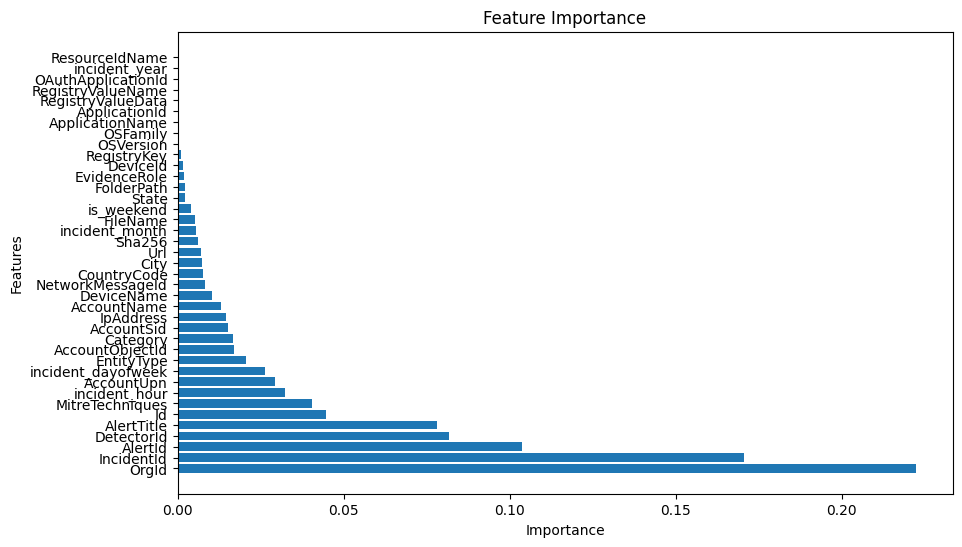

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

print(best_model)
feature_importance = best_model.feature_importances_

feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()


In [36]:
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

test_data=pd.read_csv(r"C:\Users\surej\OneDrive\Desktop\project\capstonproj4-micro\GUIDE_Test.csv")

#columns_to_drop = ['AntispamDirection','Id','OrgId', 'IncidentId', 'AlertId',
#                   'ActionGrouped', 'ActionGranular', 'EmailClusterId','ResourceType','Roles','ThreatFamily','Sha256','FileName'
#                   ]
columns_to_drop = ['ActionGrouped', 'ActionGranular', 'EmailClusterId', 'ThreatFamily', 
                   'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict','ResourceIdName','OAuthApplicationId','RegistryValueName','RegistryValueData','ApplicationId',
                   'ApplicationName','OSFamily','OSVersion','Usage']

testdataset=test_data.drop(columns_to_drop,axis=1)
testdataset.dropna(inplace=True)
testdataset['Timestamp'] = pd.to_datetime(testdataset['Timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ')

testdataset['incident_hour'] = testdataset['Timestamp'].dt.hour
testdataset['incident_dayofweek'] = testdataset['Timestamp'].dt.dayofweek
testdataset['is_weekend'] = testdataset['incident_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
testdataset['incident_year'] = testdataset['Timestamp'].dt.year
testdataset['incident_month'] = testdataset['Timestamp'].dt.month

testdataset[['Timestamp', 'incident_hour', 'incident_dayofweek', 'is_weekend','incident_month','incident_year']].head()
testdataset.drop('Timestamp', axis=1, inplace=True)
#categorical_columns = ['Category', 'MitreTechniques', 'AlertTitle','CountryCode','IncidentGrade','EntityType','EvidenceRole','Timestamp','SuspicionLevel','LastVerdict']
categorical_columns = testdataset.select_dtypes(include=['object']).columns


label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    testdataset[column] = le.fit_transform(testdataset[column].astype(str))
    label_encoders[column] = le

testdataset = testdataset.apply(pd.to_numeric, downcast='integer')


X_test = testdataset.drop(columns=['IncidentGrade'])  
y_test = testdataset['IncidentGrade']

y_test_pred = best_model.predict(X_test)

test_f1 = f1_score(y_test, y_test_pred, average='macro')
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')

print(f"Final Evaluation on Test Set:")
print(f"Macro F1 Score: {test_f1:.4f}")
print(f"Macro Precision: {test_precision:.4f}")
print(f"Macro Recall: {test_recall:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")


baseline_model = LogisticRegression(max_iter=1000)  # Replace with your baseline model if different
baseline_model.fit(X_train, y_train)  # Train the baseline on training data

y_test_baseline_pred = baseline_model.predict(X_test)

baseline_f1 = f1_score(y_test, y_test_baseline_pred, average='macro')
baseline_precision = precision_score(y_test, y_test_baseline_pred, average='macro')
baseline_recall = recall_score(y_test, y_test_baseline_pred, average='macro')

print(f"\nBaseline Model Evaluation on Test Set:")
print(f"Macro F1 Score: {baseline_f1:.4f}")
print(f"Macro Precision: {baseline_precision:.4f}")
print(f"Macro Recall: {baseline_recall:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_test_baseline_pred)}")

print(f"\nComparison:")
print(f"Optimized Model F1 Score vs. Baseline: {test_f1:.4f} vs. {baseline_f1:.4f}")
print(f"Optimized Model Precision vs. Baseline: {test_precision:.4f} vs. {baseline_precision:.4f}")
print(f"Optimized Model Recall vs. Baseline: {test_recall:.4f} vs. {baseline_recall:.4f}")


C:\Users\surej\AppData\Local\Temp\ipykernel_7776\1691190308.py:6: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data=pd.read_csv(r"C:\Users\surej\OneDrive\Desktop\project\capstonproj4-micro\GUIDE_Test.csv")


Final Evaluation on Test Set:
Macro F1 Score: 0.8570
Macro Precision: 0.8616
Macro Recall: 0.8550
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85    617944
           1       0.87      0.80      0.83    468886
           2       0.90      0.88      0.89    754058

    accuracy                           0.86   1840888
   macro avg       0.86      0.85      0.86   1840888
weighted avg       0.86      0.86      0.86   1840888


Baseline Model Evaluation on Test Set:
Macro F1 Score: 0.4861
Macro Precision: 0.5794
Macro Recall: 0.5009
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.60      0.53    617944
           1       0.68      0.18      0.28    468886
           2       0.58      0.73      0.65    754058

    accuracy                           0.54   1840888
   macro avg       0.58      0.50      0.49   1840888
weighted avg       0.57      0.54      0.

In [2]:
import gc

gc.collect() 

476